Weights: [0.2 0.1]
Bias: -0.20000000000000004


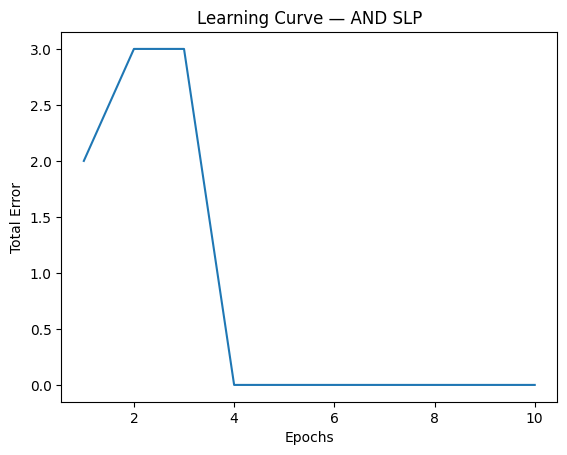

In [6]:
# Sample 1
import numpy as np
import matplotlib.pyplot as plt
# AND dataset
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,0,0,1])
w = np.zeros(2)
b = 0
eta = 0.1
epochs = 10
errors_per_epoch = []
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w += eta * error * X[i]
        b += eta * error
        total_error += abs(error)
    errors_per_epoch.append(total_error)
print("Weights:", w)
print("Bias:", b)
plt.plot(range(1, epochs+1), errors_per_epoch)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve — AND SLP")
plt.show()

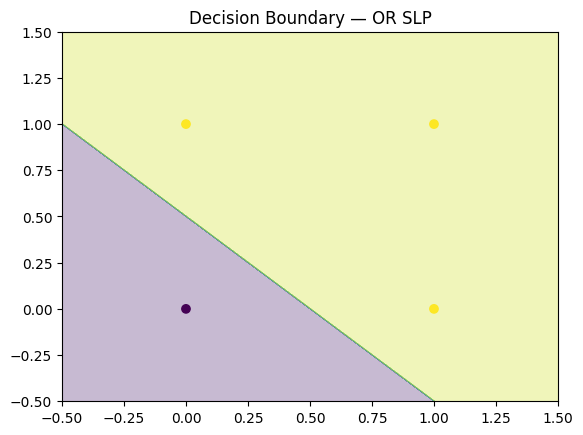

In [5]:
# Sample 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
# OR dataset
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,1,1,1])
slp = Perceptron(max_iter=1000, eta0=0.1, random_state=1)
slp.fit(X,y)
# Grid
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(
    np.linspace(x_min,x_max,300),
    np.linspace(y_min,y_max,300)
)
Z = slp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Decision Boundary — OR SLP")
plt.show()

Predicted: [0 1 1 0]
Actual: [0 1 1 0]


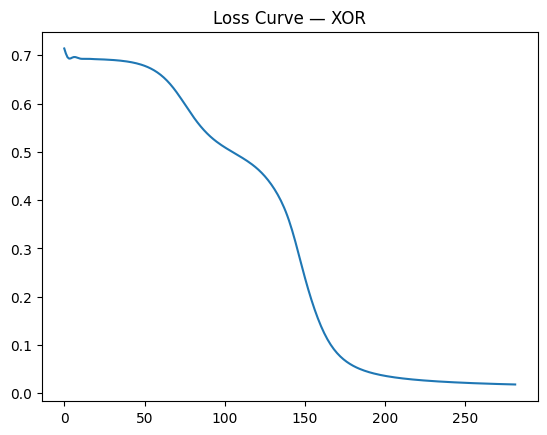

In [4]:
# Sample 3
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,1,1,0])
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.5,
    max_iter=5000,
    random_state=1
)
mlp.fit(X,y)
pred = mlp.predict(X)
print("Predicted:", pred)
print("Actual:", y)
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve — XOR")
plt.show()

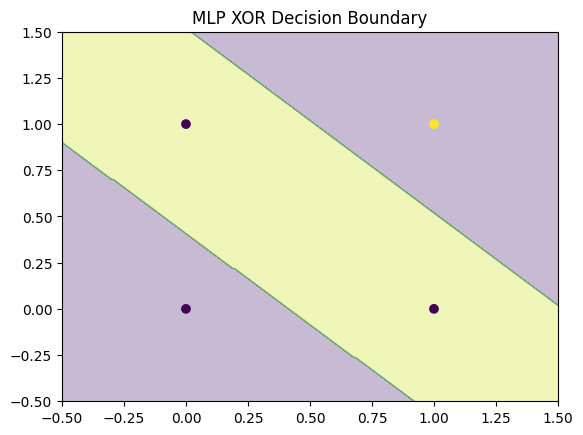

In [7]:
# Sample 4
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(
    np.linspace(x_min,x_max,300),
    np.linspace(y_min,y_max,300)
)
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("MLP XOR Decision Boundary")
plt.show()

Accuracy: 1.0


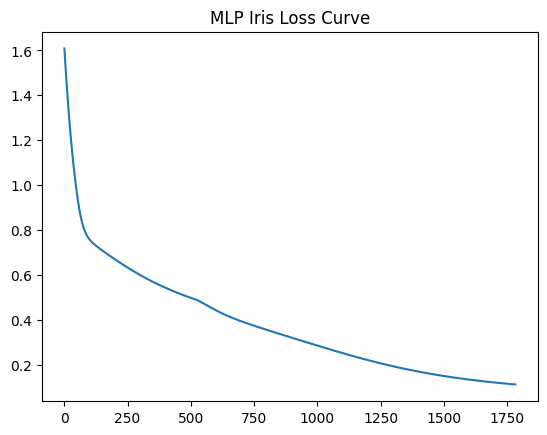

In [9]:
# Sample 5
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=1
)
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    max_iter=3000,
    random_state=1
)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
plt.plot(mlp.loss_curve_)
plt.title("MLP Iris Loss Curve")
plt.show()

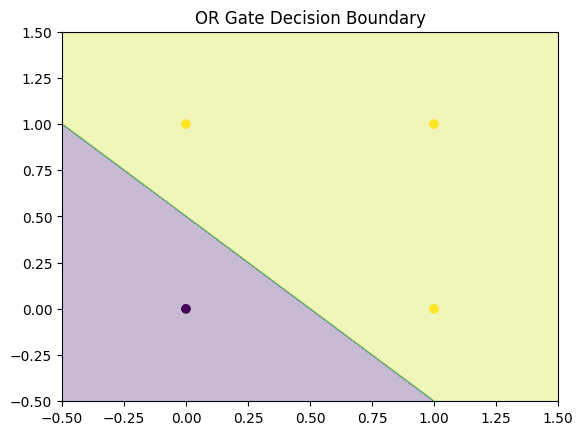

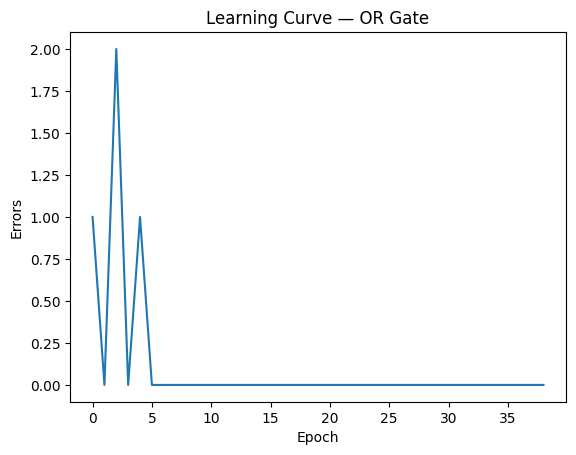

In [11]:
# Exercise 1
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])
model = Perceptron(
    max_iter=100,
    eta0=0.1,
    tol=None,
    random_state=1
)
model.fit(X,y)
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,300),
                     np.linspace(-0.5,1.5,300))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("OR Gate Decision Boundary")
plt.show()
errors=[]
for i in range(1,40):
    tmp = Perceptron(
        max_iter=i,
        eta0=0.1,
        tol=None,
        random_state=1
    )
    tmp.fit(X,y)
    errors.append((tmp.predict(X)!=y).sum())
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Errors")
plt.title("Learning Curve — OR Gate")
plt.show()

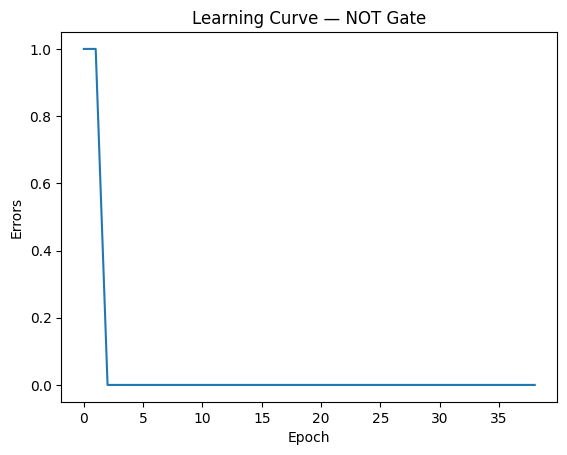

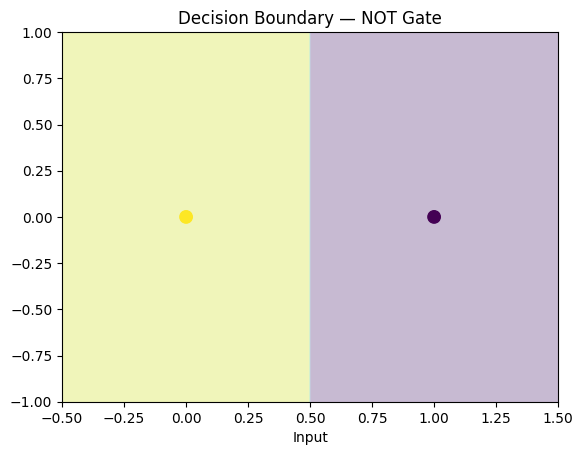

In [13]:
# Exercise 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
X = np.array([[0],[1]])
y = np.array([1,0])
model = Perceptron(max_iter=50, tol=None, eta0=0.1, random_state=1)
model.fit(X,y)
errors=[]
for i in range(1,40):
    tmp = Perceptron(max_iter=i, tol=None)
    tmp.fit(X,y)
    errors.append((tmp.predict(X)!=y).sum())
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Errors")
plt.title("Learning Curve — NOT Gate")
plt.show()
X_plot = np.hstack([X, np.zeros((len(X),1))])
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,300),
                     np.linspace(-1,1,300))
grid = np.c_[xx.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_plot[:,0], X_plot[:,1], c=y, s=80)
plt.xlabel("Input")
plt.title("Decision Boundary — NOT Gate")
plt.show()

Accuracy: 0.9666666666666667


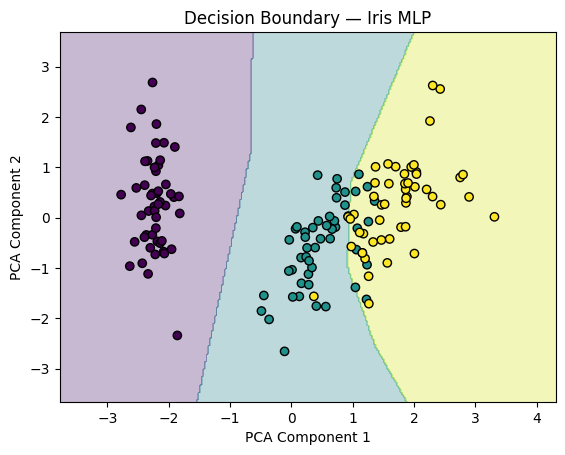

In [14]:
# Exercise 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=1
)
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    max_iter=2000,
    random_state=1
)
mlp.fit(X_train, y_train)
print("Accuracy:", mlp.score(X_test, y_test))
x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, edgecolor="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary — Iris MLP")
plt.show()

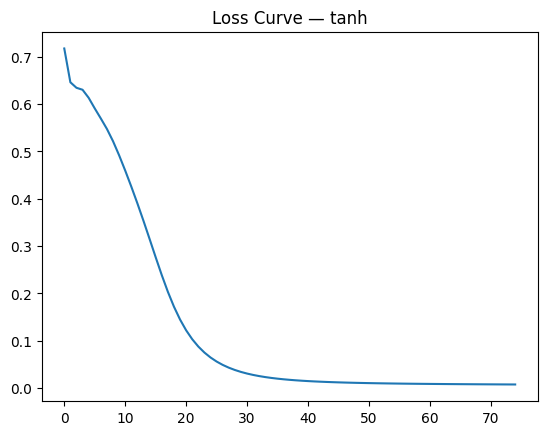

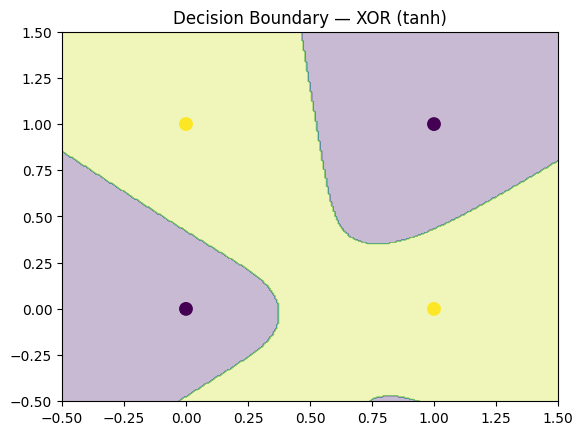

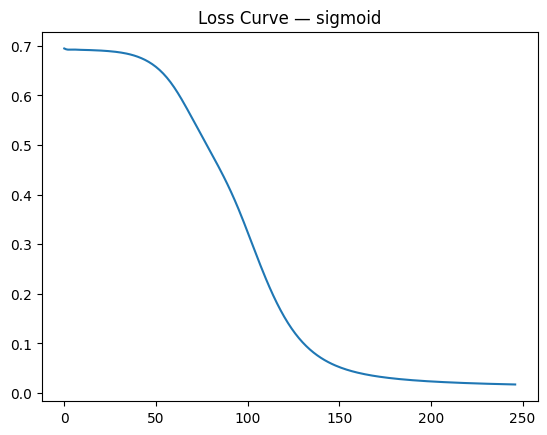

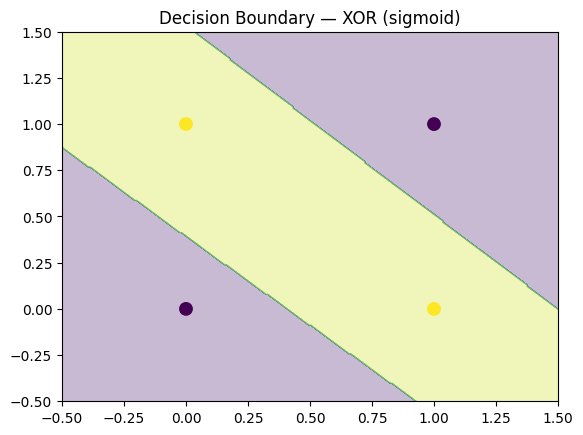

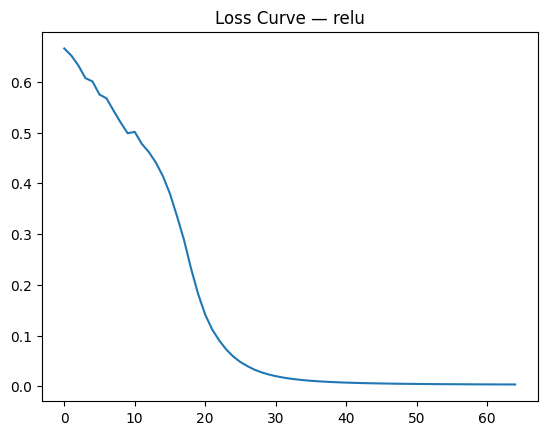

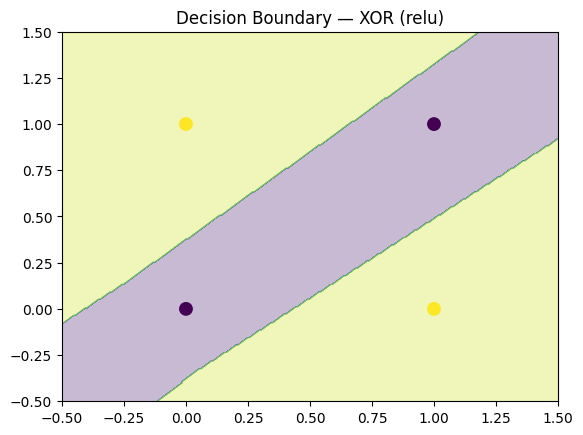

In [15]:
# Exercise 4 - on Sample 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
# XOR data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
activations = {
    "tanh":"tanh",
    "sigmoid":"logistic",
    "relu":"relu"
}
for name, act in activations.items():
    mlp = MLPClassifier(
        hidden_layer_sizes=(4,),
        activation=act,
        solver='sgd',
        learning_rate_init=0.5,
        max_iter=5000,
        random_state=1
    )
    mlp.fit(X,y)
    plt.plot(mlp.loss_curve_)
    plt.title(f"Loss Curve — {name}")
    plt.show()
    xx, yy = np.meshgrid(
        np.linspace(-0.5,1.5,300),
        np.linspace(-0.5,1.5,300)
    )
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=y,s=80)
    plt.title(f"Decision Boundary — XOR ({name})")
    plt.show()

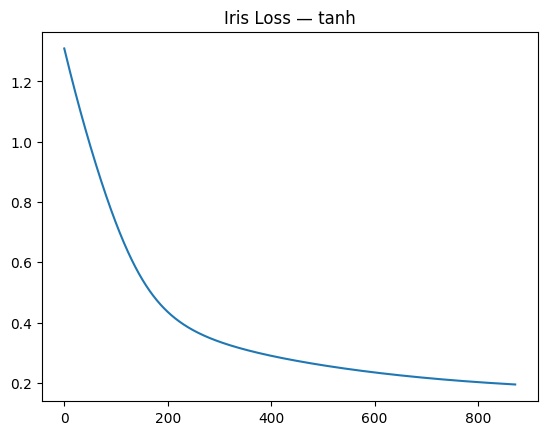

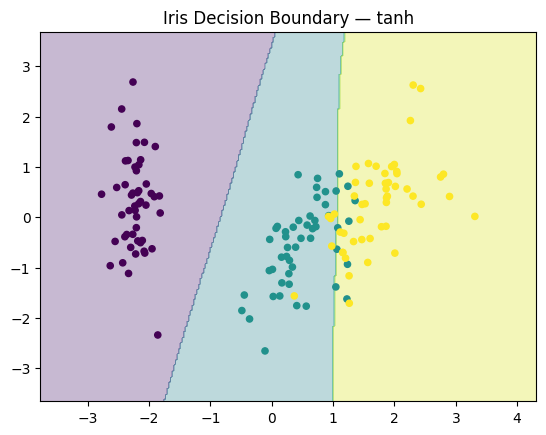

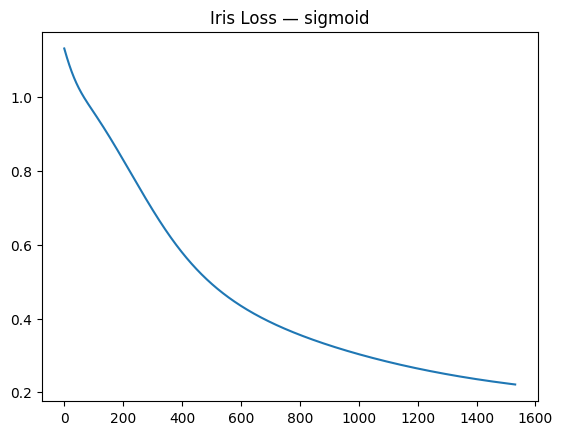

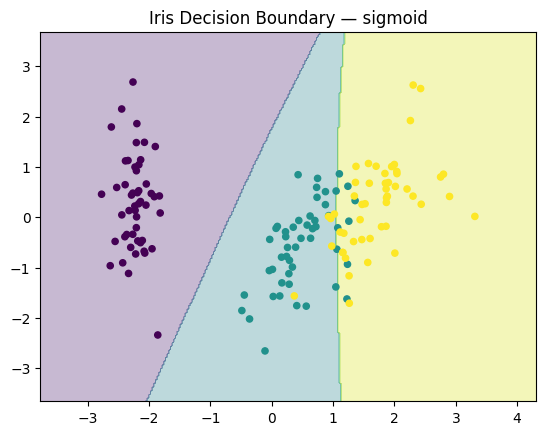

In [16]:
# Exercise 4 - with Sample 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
iris = load_iris()
X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X)
X = PCA(n_components=2).fit_transform(X)
activations = {
    "tanh":"tanh",
    "sigmoid":"logistic"
}
for name, act in activations.items():
    mlp = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation=act,
        max_iter=2000,
        random_state=1
    )
    mlp.fit(X,y)
    plt.plot(mlp.loss_curve_)
    plt.title(f"Iris Loss — {name}")
    plt.show()
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    )
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=y,s=20)
    plt.title(f"Iris Decision Boundary — {name}")
    plt.show()

Accuracy: 0.9473684210526315


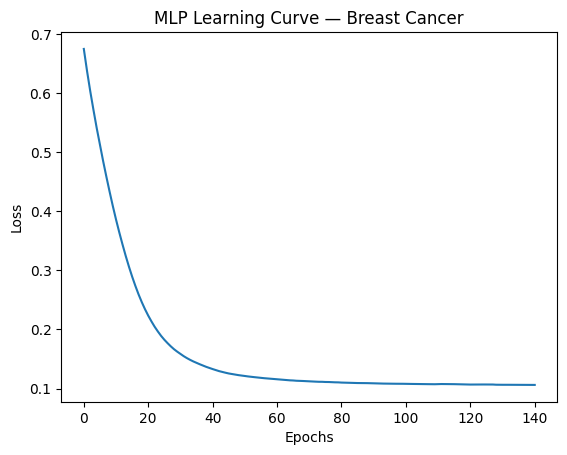

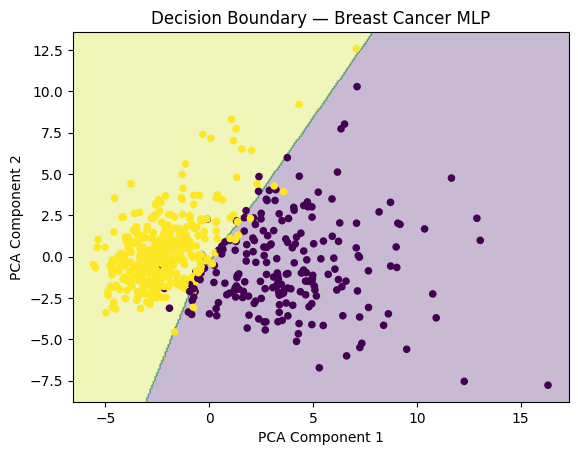

In [17]:
# Exercise 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# PCA -> 2D for boundary plotting
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=1
)
# MLP Model
mlp = MLPClassifier(
    hidden_layer_sizes=(30,15),
    activation='relu',
    max_iter=3000,
    random_state=1
)
mlp.fit(X_train, y_train)
# Accuracy Evaluation
pred = mlp.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)
# Learning Curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Learning Curve — Breast Cancer")
plt.show()
# Decision Boundary
x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary — Breast Cancer MLP")
plt.show()

Accuracy: 0.3825


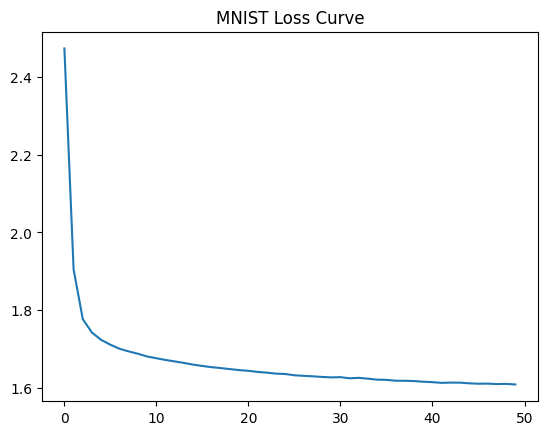

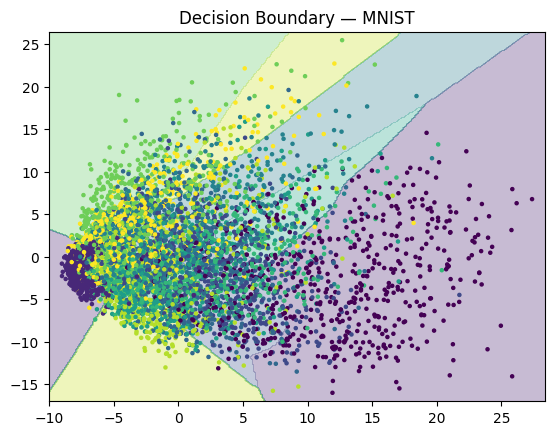

In [19]:
# Exercise 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# Load MNIST subset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:6000]
y = mnist.target[:6000].astype(int)
# Scale
X = StandardScaler().fit_transform(X)
# PCA to 2D
X_2d = PCA(n_components=2).fit_transform(X)
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=1
)
# Train MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    max_iter=50,
    random_state=1
)
mlp.fit(X_train, y_train)
print("Accuracy:", mlp.score(X_test, y_test))
# Loss Curve
plt.plot(mlp.loss_curve_)
plt.title("MNIST Loss Curve")
plt.show()
# Decision Boundary
xx, yy = np.meshgrid(
    np.linspace(X_2d[:,0].min()-1, X_2d[:,0].max()+1, 300),
    np.linspace(X_2d[:,1].min()-1, X_2d[:,1].max()+1, 300)
)
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, s=5)
plt.title("Decision Boundary — MNIST")
plt.show()